<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/9%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_RNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')

X = df[['Open', 'High', 'Low']].values
y = df['Close'].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2956, 3)
Shape of y: (2956, 1)


In [2]:
# 2. 정규화 (Scaling)
X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

print("Shape of scaled X:", X_scaled.shape)
print("Shape of scaled y:", y_scaled.shape)

Shape of scaled X: (2956, 3)
Shape of scaled y: (2956, 1)


In [3]:
# 3. 시퀀스 생성
# Create sequences for features (X) and corresponding target (y)
window = 12   # Use the previous 12 data points to predict the next
X_sequences, y_sequences = [], []
for i in range(len(X_scaled) - window):
    X_sequences.append(X_scaled[i : i + window])
    y_sequences.append(y_scaled[i + window])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

print("Shape of X sequences:", X_sequences.shape)
print("Shape of y sequences:", y_sequences.shape)

Shape of X sequences: (2944, 12, 3)
Shape of y sequences: (2944, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)

In [5]:
# 5. RNN 모델 구축
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=(X_sequences.shape[1], X_sequences.shape[2])), # Corrected input_shape
    tf.keras.layers.SimpleRNN(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 12, 50)         │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,801 (30.47 KB)

 Trainable params: 7,801 (30.47 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 6. RNN 모델 훈련
history = model.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.6317e-04 - val_loss: 2.5075e-04
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.7459e-04 - val_loss: 4.6589e-04
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 7.6662e-04 - val_loss: 0.0011
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.6545e-04 - val_loss: 1.6149e-04
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.1188e-04 - val_loss: 2.1306e-04
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4276e-04 - val_loss: 2.7248e-04
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.8266e-04 - val_loss: 1.9635e-04
Epoch 9/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4.7135e-04 - val_loss: 3.2104e-04
Epoch 10/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3642e-04 - val_loss: 1.1492e-04
Epoch 11/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.6750e-

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


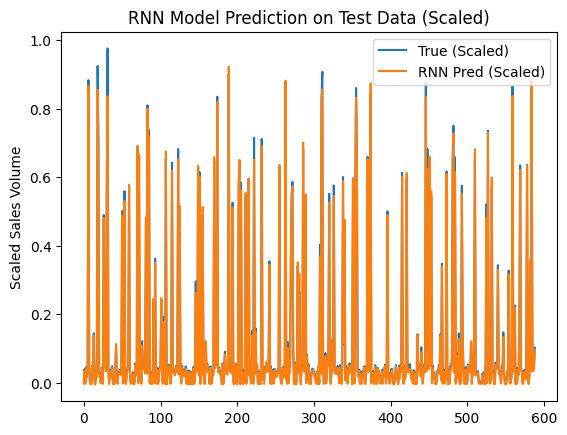

In [7]:
# 7. RNN 모델 예측 및 시각화 (테스트 데이터 사용) - 정규화된 데이터 스케일
pred_rnn = model.predict(X_test)
plt.plot(y_test, label='True (Scaled)')
plt.plot(pred_rnn, label='RNN Pred (Scaled)')
plt.legend(); plt.title('RNN Model Prediction on Test Data (Scaled)'); plt.ylabel('Scaled Sales Volume'); plt.show()

In [8]:
# 4. LSTM 모델 구축 및 훈련
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=64, input_shape=(X_sequences.shape[1], X_sequences.shape[2])), # Corrected input_shape for LSTM
    tf.keras.layers.Dense(units=1)
])

modelLSTM.compile(optimizer='adam', loss='mse')

# Train the LSTM model
history_lstm = modelLSTM.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0049 - val_loss: 4.1235e-04
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1824e-04 - val_loss: 2.8034e-04
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.9065e-04 - val_loss: 2.3646e-04
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2391e-04 - val_loss: 3.1303e-04
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.8507e-04 - val_loss: 3.3028e-04
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.2469e-04 - val_loss: 1.7341e-04
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.4860e-04 - val_loss: 0.0010
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.3946e-04 - val_loss: 1.5534e-04
Epoch 9/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.0187e-04 - val_loss: 1.5247e-04
Epoch 10/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.5042e-04 - val_loss: 1.3831e-04
Epoch 11/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


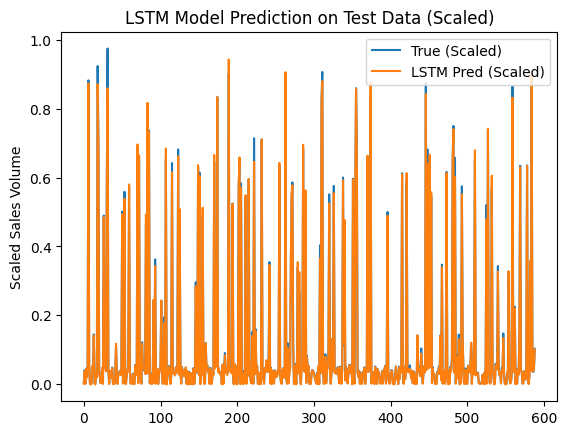

In [9]:
# 7. LSTM 모델 예측 및 시각화 (테스트 데이터 사용) - 정규화된 데이터 스케일
pred_lstm = modelLSTM.predict(X_test)
plt.plot(y_test, label='True (Scaled)')
plt.plot(pred_lstm, label='LSTM Pred (Scaled)')
plt.legend(); plt.title('LSTM Model Prediction on Test Data (Scaled)'); plt.ylabel('Scaled Sales Volume'); plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RNN 모델 MSE 및 RMSE 계산 (정규화된 데이터 사용)
mse_rnn_scaled = mean_squared_error(y_test, model.predict(X_test))
rmse_rnn_scaled = np.sqrt(mse_rnn_scaled)
print(f"RNN 모델의 MSE (정규화된 데이터): {mse_rnn_scaled}")
print(f"RNN 모델의 RMSE (정규화된 데이터): {rmse_rnn_scaled}")

# LSTM 모델 MSE 및 RMSE 계산 (정규화된 데이터 사용)
mse_lstm_scaled = mean_squared_error(y_test, modelLSTM.predict(X_test))
rmse_lstm_scaled = np.sqrt(mse_lstm_scaled)
print(f"LSTM 모델의 MSE (정규화된 데이터): {mse_lstm_scaled}")
print(f"LSTM 모델의 RMSE (정규화된 데이터): {rmse_lstm_scaled}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RNN 모델의 MSE (정규화된 데이터): 0.00014279339568166484
RNN 모델의 RMSE (정규화된 데이터): 0.01194961906010668
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM 모델의 MSE (정규화된 데이터): 0.00010753565655752117
LSTM 모델의 RMSE (정규화된 데이터): 0.010369940045994536
